# Deep Learning for Media 
#### MPATE-GE 2039 - DM-GY 9103 

---

## Homework 1 

**Instructions:**

1. Complete parts 1 through 5, filling in code in the `utils.py` file where indicated **# YOUR CODE HERE** or responses in `this notebook` where marked with **# YOUR RESPONSE HERE**.
2. **Document** your code. Add comments explaining what the different parts of your code are doing. 
3. If you copy code from external resources like Stackoverflow (which is fine), include references as comments.
4. When finished, commit and push this completed notebook file along with the `utils.py` file and `any other files indicated in the instructions` to your GitHub repository corresponding to this homework.
5. IMPORTANT: do not modify any of the provided code.

**Grading:** 

- This homework is worth 10 points.
- Each function you code in `utils.py` is worth 1 point, for a total of 7 points. 
- Each answer in part 5 is worth 1 point, for a total of 3 points.
- Points will be automatically assigned when passing tests, and manually assigned when it comes to your written responses.

**Academic integrity:**

Remember that this homework should be authored by you only. It's ok to discuss with classmates but you have to submit your own original solution.

## Mars Mushroom Menace: A Binary Classification Challenge

---

You have been selected as a member of the first colony on Mars. Your mission is to explore the Martian forests and conduct scientific experiments. However, before setting out on your journey, you must prepare for the dangerous conditions of the planet. In particular, the only food resource available is mashrooms, but many of them are deadly poisonous. You must create a classifier to identify which of the Martian mushrooms are poisonous and which are not.

Using the deep learning skills you just acquired, you will train a model to classify Martian mushrooms as poisonous or non-poisonous. You have been given a dataset of Martian mushroom samples, and it is your task to create a model that can accurately classify the samples.

Remember, the stakes are high. A misclassification could lead to disastrous consequences for you and your fellow explorers. On the other hand, you need to have some mashrooms to eat or you and the crew will starve. It's a fine balance. Good luck, and happy coding!





In [1]:
# This notebook is for visualization and written answers only
# Your code should go in utils.py
import utils as u # to use the functions from utils, do u.function()

In [2]:
# Fix the random seed for reproducibility
from numpy.random import seed
seed(124)
import tensorflow as tf
tf.keras.utils.set_random_seed(124)

## Part 1 - Load the dataset and split it

Organize the data by:
1. Loading the Mars Mushroom dataset, which consists of binary indicators of features indicating the different characteristics of the mushrooms (e.g. cap shape).
2. Splitting the training data into training and validation.


In [3]:
# Load data
X_train, X_test, y_train, y_test = u.load_data() 

In [4]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape) # check data dimensions X.shape==(samples, features)

(5760, 115) (640, 115) (5760,) (640,)


In [5]:
# Split data
X_train, X_val, y_train, y_val = u.split_data(X_train, y_train)

In [6]:
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape) # check data dimensions X.shape==(samples, features)

(5184, 115) (576, 115) (5184,) (576,)


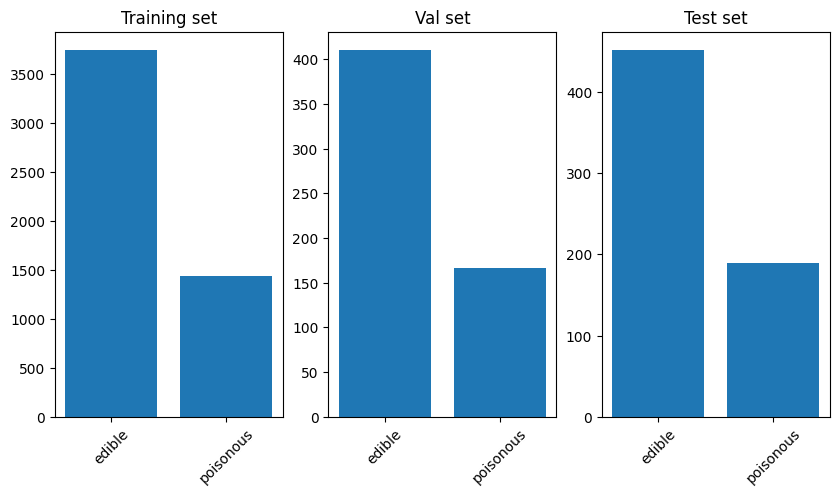

In [7]:
u.explore_data(X_train, y_train, y_test, y_val)

## Part 2 - Build and train a baseline

Build a baseline model that classifies the mushrooms into "edible" or "poisonous". Note that your model should solve a binary classification problem. 

In [8]:
print(X_train.shape[1])

115


In [9]:
# Build baseline
baseline = u.build_baseline(X_train.shape[1])

In [10]:
# Train model

model, history = u.train_model(baseline, X_train, y_train, 
                    epochs=10, 
                    class_weights=None,
                    X_val=X_val, y_val=y_val)

Epoch 1/10
162/162 [==============================] - 1s 3ms/step - loss: 0.5186 - accuracy: 0.6833 - val_loss: 0.4439 - val_accuracy: 0.7135
Epoch 2/10
162/162 [==============================] - 0s 2ms/step - loss: 0.4118 - accuracy: 0.7319 - val_loss: 0.4051 - val_accuracy: 0.7396
Epoch 3/10
162/162 [==============================] - 0s 2ms/step - loss: 0.3858 - accuracy: 0.7527 - val_loss: 0.3877 - val_accuracy: 0.7500
Epoch 4/10
162/162 [==============================] - 0s 2ms/step - loss: 0.3715 - accuracy: 0.7668 - val_loss: 0.3772 - val_accuracy: 0.7396
Epoch 5/10
162/162 [==============================] - 0s 2ms/step - loss: 0.3609 - accuracy: 0.7811 - val_loss: 0.3755 - val_accuracy: 0.7361
Epoch 6/10
162/162 [==============================] - 0s 2ms/step - loss: 0.3526 - accuracy: 0.7876 - val_loss: 0.3741 - val_accuracy: 0.7413
Epoch 7/10
162/162 [==============================] - 0s 2ms/step - loss: 0.3438 - accuracy: 0.8009 - val_loss: 0.3734 - val_accuracy: 0.7517
Epoch 

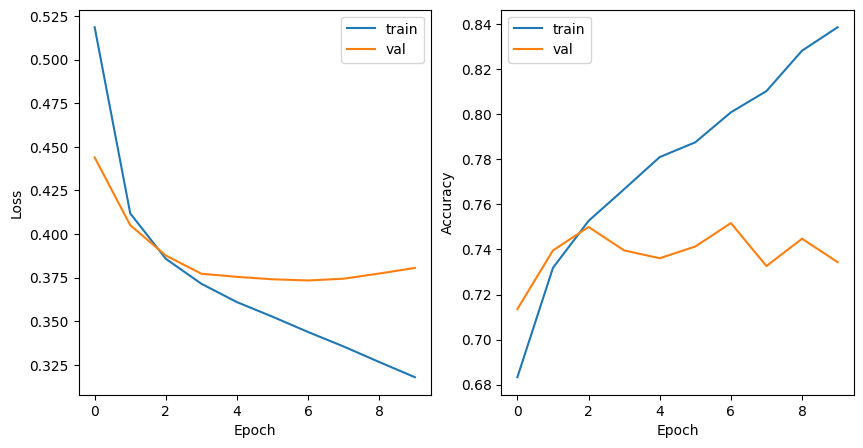

In [11]:
u.plot_loss(history)

## Part 3 - Evaluate the baseline

As discussed before, you have to strike a good balance between identifying as many poisonous mushrooms as possible to be safe (i.e. your model should have high recall for these mushrooms), but you also need to identify well enough the edible mushrooms so you don't starve. Tune your model to achieve over 90% recall in poisonous mushrooms, and over 90% of precision in edible mushrooms. You can try different combinations of:
- The model architecture (e.g. layers' size, number of layers).
- The number of epochs that the model trains.
- The class weights (to balance the dataset).

In [12]:
# Evaluate model
u.evaluate_model(baseline, X_test, y_test)

20/20 [==============================] - 0s 2ms/step - loss: 0.3802 - accuracy: 0.7625


0.762499988079071

In [13]:
from sklearn.metrics import classification_report
import numpy as np

# Predict labels for test data
y_pred = u.classify_mushrooms(baseline, X_test)

# Compute classification report
target_names = ['edible', 'poisonous']
report = classification_report(list(y_test), 
                               list(y_pred), 
                               target_names=target_names)

print(report)


20/20 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

      edible       0.70      1.00      0.83       451
   poisonous       0.00      0.00      0.00       189

    accuracy                           0.70       640
   macro avg       0.35      0.50      0.41       640
weighted avg       0.50      0.70      0.58       640



c:\Users\86139\miniconda3\envs\dl4m\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\86139\miniconda3\envs\dl4m\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\86139\miniconda3\envs\dl4m\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [14]:
# Classify mushrooms

# sample random mushroom
idx = np.random.randint(0, len(y_test), size=1)[0] 
mushroom_features = X_test[idx][np.newaxis, :] 
print('This mushroom is labeled as edible.' if y_test[idx]==0 else 
      'This mushroom is labeled as poisonous.')

# Use your model to make predictions
y_pred = u.classify_mushrooms(baseline, mushroom_features)

if y_pred[0] == 1:
    print('Your prediction says the mushroom is poisonous!')
else:
    print('Your prediction says the mushroom is edible!')

This mushroom is labeled as poisonous.
1/1 [==============================] - 0s 74ms/step
Your prediction says the mushroom is edible!


## Part 4 - Build a better model

As discussed before, you have to strike a good balance between identifying as many poisonous mushrooms as possible to be safe (i.e. your model should have high recall for these mushrooms), but you also need to identify well enough the edible mushrooms so you don't starve. Tune your model to achieve over 90% recall in poisonous mushrooms, and over 90% of precision in edible mushrooms. You can try different combinations of (in whatever order):
- The model architecture (e.g. layers' size, number of layers).
- The number of epochs that the model trains.
- The class weights (to balance the dataset).

In [15]:
# Build model
model = u.build_model(X_train.shape[1])

In [16]:
# Train model
class_weights = {0: 1, # edible class
                 1: 1} # poisonous class

model, history = u.train_model(model, X_train, y_train, 
                    epochs=10, 
                    class_weights=class_weights,
                    X_val=X_val, y_val=y_val)

Epoch 1/10
162/162 [==============================] - 1s 3ms/step - loss: 0.4364 - accuracy: 0.7159 - val_loss: 0.4030 - val_accuracy: 0.7083
Epoch 2/10
162/162 [==============================] - 0s 2ms/step - loss: 0.3837 - accuracy: 0.7427 - val_loss: 0.3867 - val_accuracy: 0.7413
Epoch 3/10
162/162 [==============================] - 0s 2ms/step - loss: 0.3703 - accuracy: 0.7591 - val_loss: 0.3746 - val_accuracy: 0.7396
Epoch 4/10
162/162 [==============================] - 0s 2ms/step - loss: 0.3590 - accuracy: 0.7639 - val_loss: 0.3641 - val_accuracy: 0.7292
Epoch 5/10
162/162 [==============================] - 0s 2ms/step - loss: 0.3497 - accuracy: 0.7762 - val_loss: 0.3689 - val_accuracy: 0.7396
Epoch 6/10
162/162 [==============================] - 0s 2ms/step - loss: 0.3423 - accuracy: 0.7899 - val_loss: 0.3612 - val_accuracy: 0.7326
Epoch 7/10
162/162 [==============================] - 0s 2ms/step - loss: 0.3361 - accuracy: 0.7992 - val_loss: 0.3647 - val_accuracy: 0.7378
Epoch 

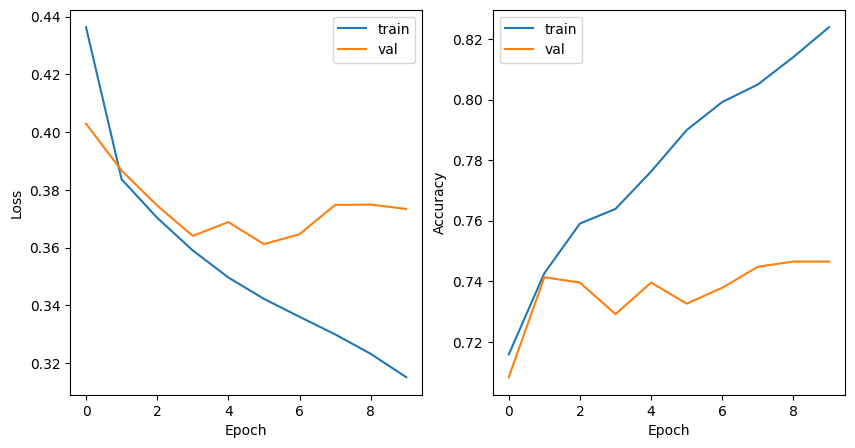

In [17]:
u.plot_loss(history)

In [18]:
# Evaluate model
u.evaluate_model(model, X_test, y_test)

20/20 [==============================] - 0s 2ms/step - loss: 0.3728 - accuracy: 0.7172


0.7171875238418579

In [19]:
# Predict labels for test data
y_pred = u.classify_mushrooms(model, X_test)

# Compute classification report
target_names = ['edible', 'poisonous']
report = classification_report(list(y_test), 
                               list(y_pred), 
                               target_names=target_names)

print(report)


20/20 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

      edible       0.70      1.00      0.83       451
   poisonous       0.00      0.00      0.00       189

    accuracy                           0.70       640
   macro avg       0.35      0.50      0.41       640
weighted avg       0.50      0.70      0.58       640



c:\Users\86139\miniconda3\envs\dl4m\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\86139\miniconda3\envs\dl4m\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\86139\miniconda3\envs\dl4m\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Save the predictions and upload them in GitHub for evaluation.

In [20]:
# Save predictions
np.save('./results/y_pred.npy', y_pred)

## Part 5 - Discuss the problem

1. Is accuracy a useful metric in this problem? Why?
2. Discuss the compromise between having good precision and good recall for each of the classes. Why is this necessary?
3. What methods other than the one you used to improve the performance of the model can you think of?

`#YOUR RESPONSES HERE`